# Домашнее задание 1

In [7]:
!pip install missingno

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Задание 1:
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы

In [3]:
print('train количество записей = {}, количество признаков + целевой признак = {}'.format(*train.shape))
print('train количество записей = {}, количество признаков = {}'.format(*test.shape))

train количество записей = 200000, количество признаков + целевой признак = 202
train количество записей = 200000, количество признаков = 201


In [4]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


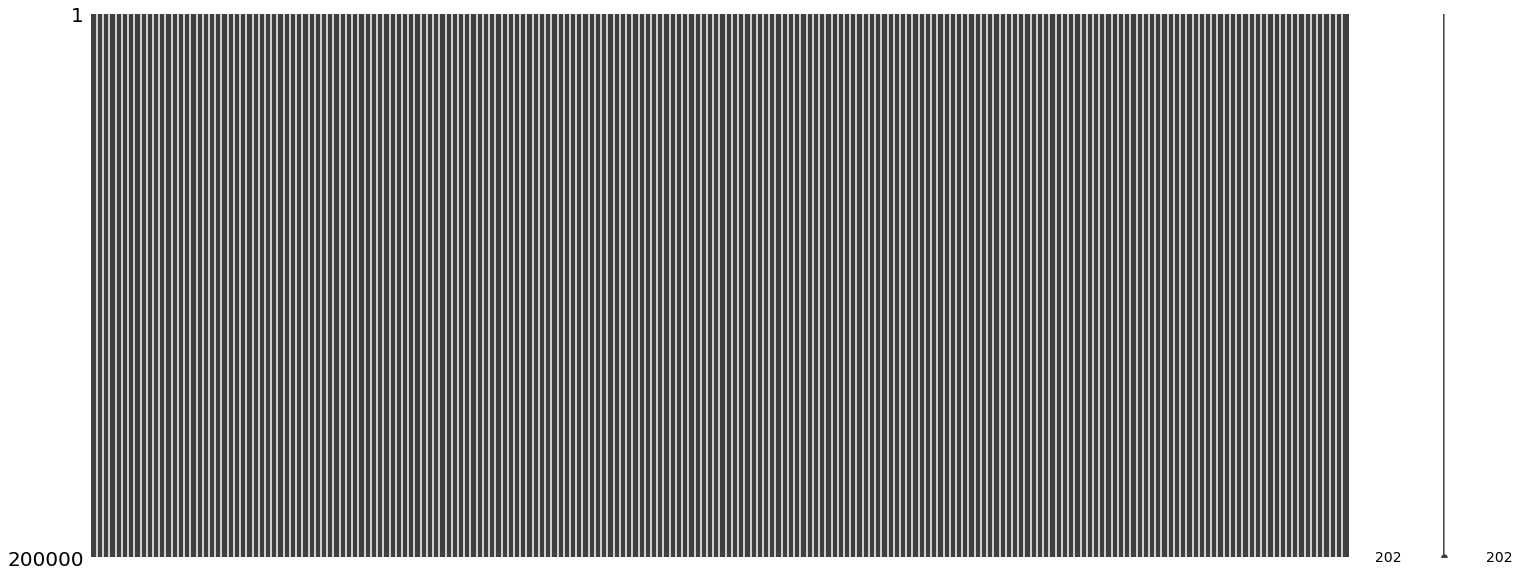

In [6]:
msno.matrix(train)

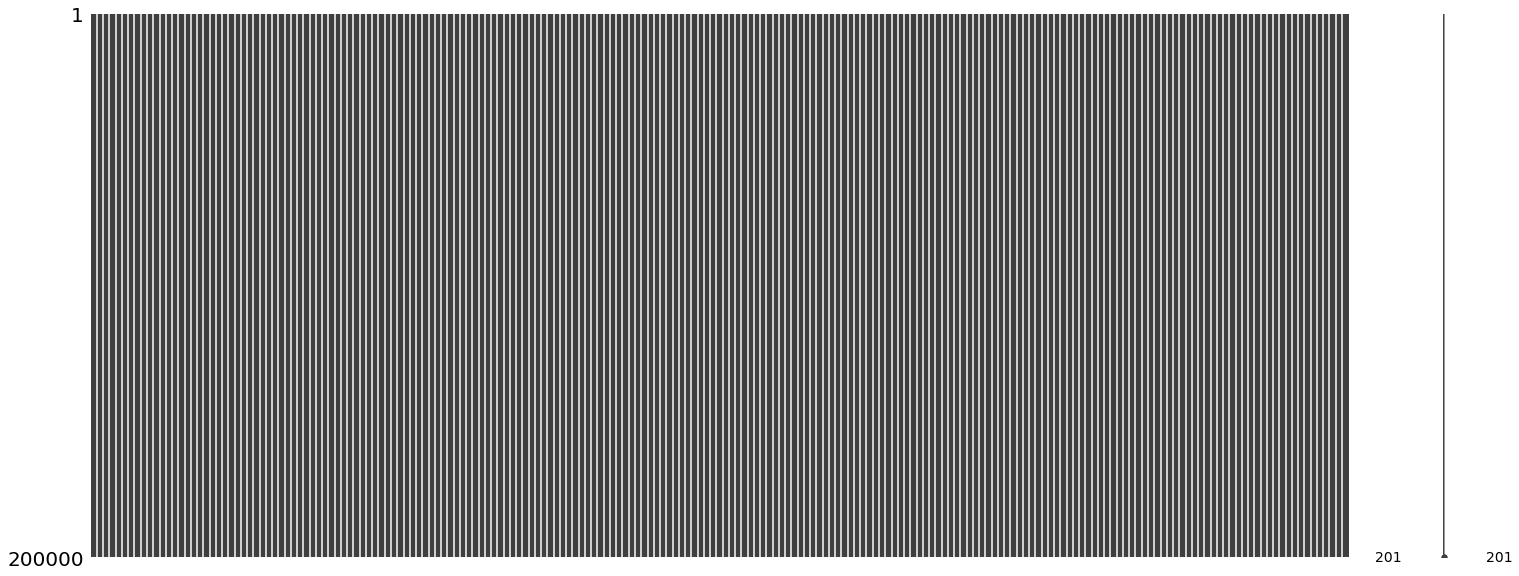

In [7]:
msno.matrix(test)

пропусков в данных нет

In [8]:
print(f'Количество пропусков в тренировочном датасете = {train.isnull().sum().sum()}')
print(f'Количество пропусков в тестовом датасете = {test.isnull().sum().sum()}')

Количество пропусков в тренировочном датасете = 0
Количество пропусков в тестовом датасете = 0


данные все есть, данные все заполнены, пропусков нет

# Задание 2:
Сделать базовый анализ целевой переменной, сделать выводы

In [9]:
train['target'].value_counts()
# целевая переменная принимает всего только 2 значения 0 или 1, скорее всего - модель направлена на решение
# задачи бинарной классификации из разряда (выдавать/невыдавать кредит или какой-нибудь антифрод как пример) 

0    179902
1     20098
Name: target, dtype: int64

# Задание 3: 
Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы

In [10]:
numerical_features = train.select_dtypes(np.number)
len(numerical_features)
numerical

NameError: name 'numerical' is not defined

In [ ]:
discrete_features = [
    feature for feature in numerical_features
    if train[feature].value_counts().count() < 25 and feature not in ['target'] # для проверки вместо 25, также можно подставить 3 и проверить
]
len(categorial_feature)
# нет дискретных признаков

In [ ]:
categorical_features = train.select_dtypes(include=[np.object])
print(f"количество категориальных признаков = {categorical_features.shape[1]}")
print(categorical_features)

In [ ]:

features = [feature for feature in numerical_features
           if feature in ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13',
                          'var_20', 'var_26', 'var_40', 'var_55', 'var_80', 'var_106',
                          'var_109', 'var_139', 'var_175', 'var_184', 'var_196']]

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))

for num, feature in enumerate(features):
    data = train[feature].copy()
    axes[num//3, num%3].hist(data, bins=25, color="blue")
    axes[num//3, num%3].set_xlabel(feature, fontsize=14)

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(20, 20))

for num, feature in enumerate(features):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//3, num%3], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//3, num%3], color="blue", label="train")
    axes[num//3, num%3].set_title(feature, fontsize=14)

Почти все из списка var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196
Распределены нормально, так оно и должно быть, так как данных в целом достаточно много

Распределения признаков одновременно на тестовой и обучающей выборке распределены одинаково

# Задание 4:
Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы

In [12]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


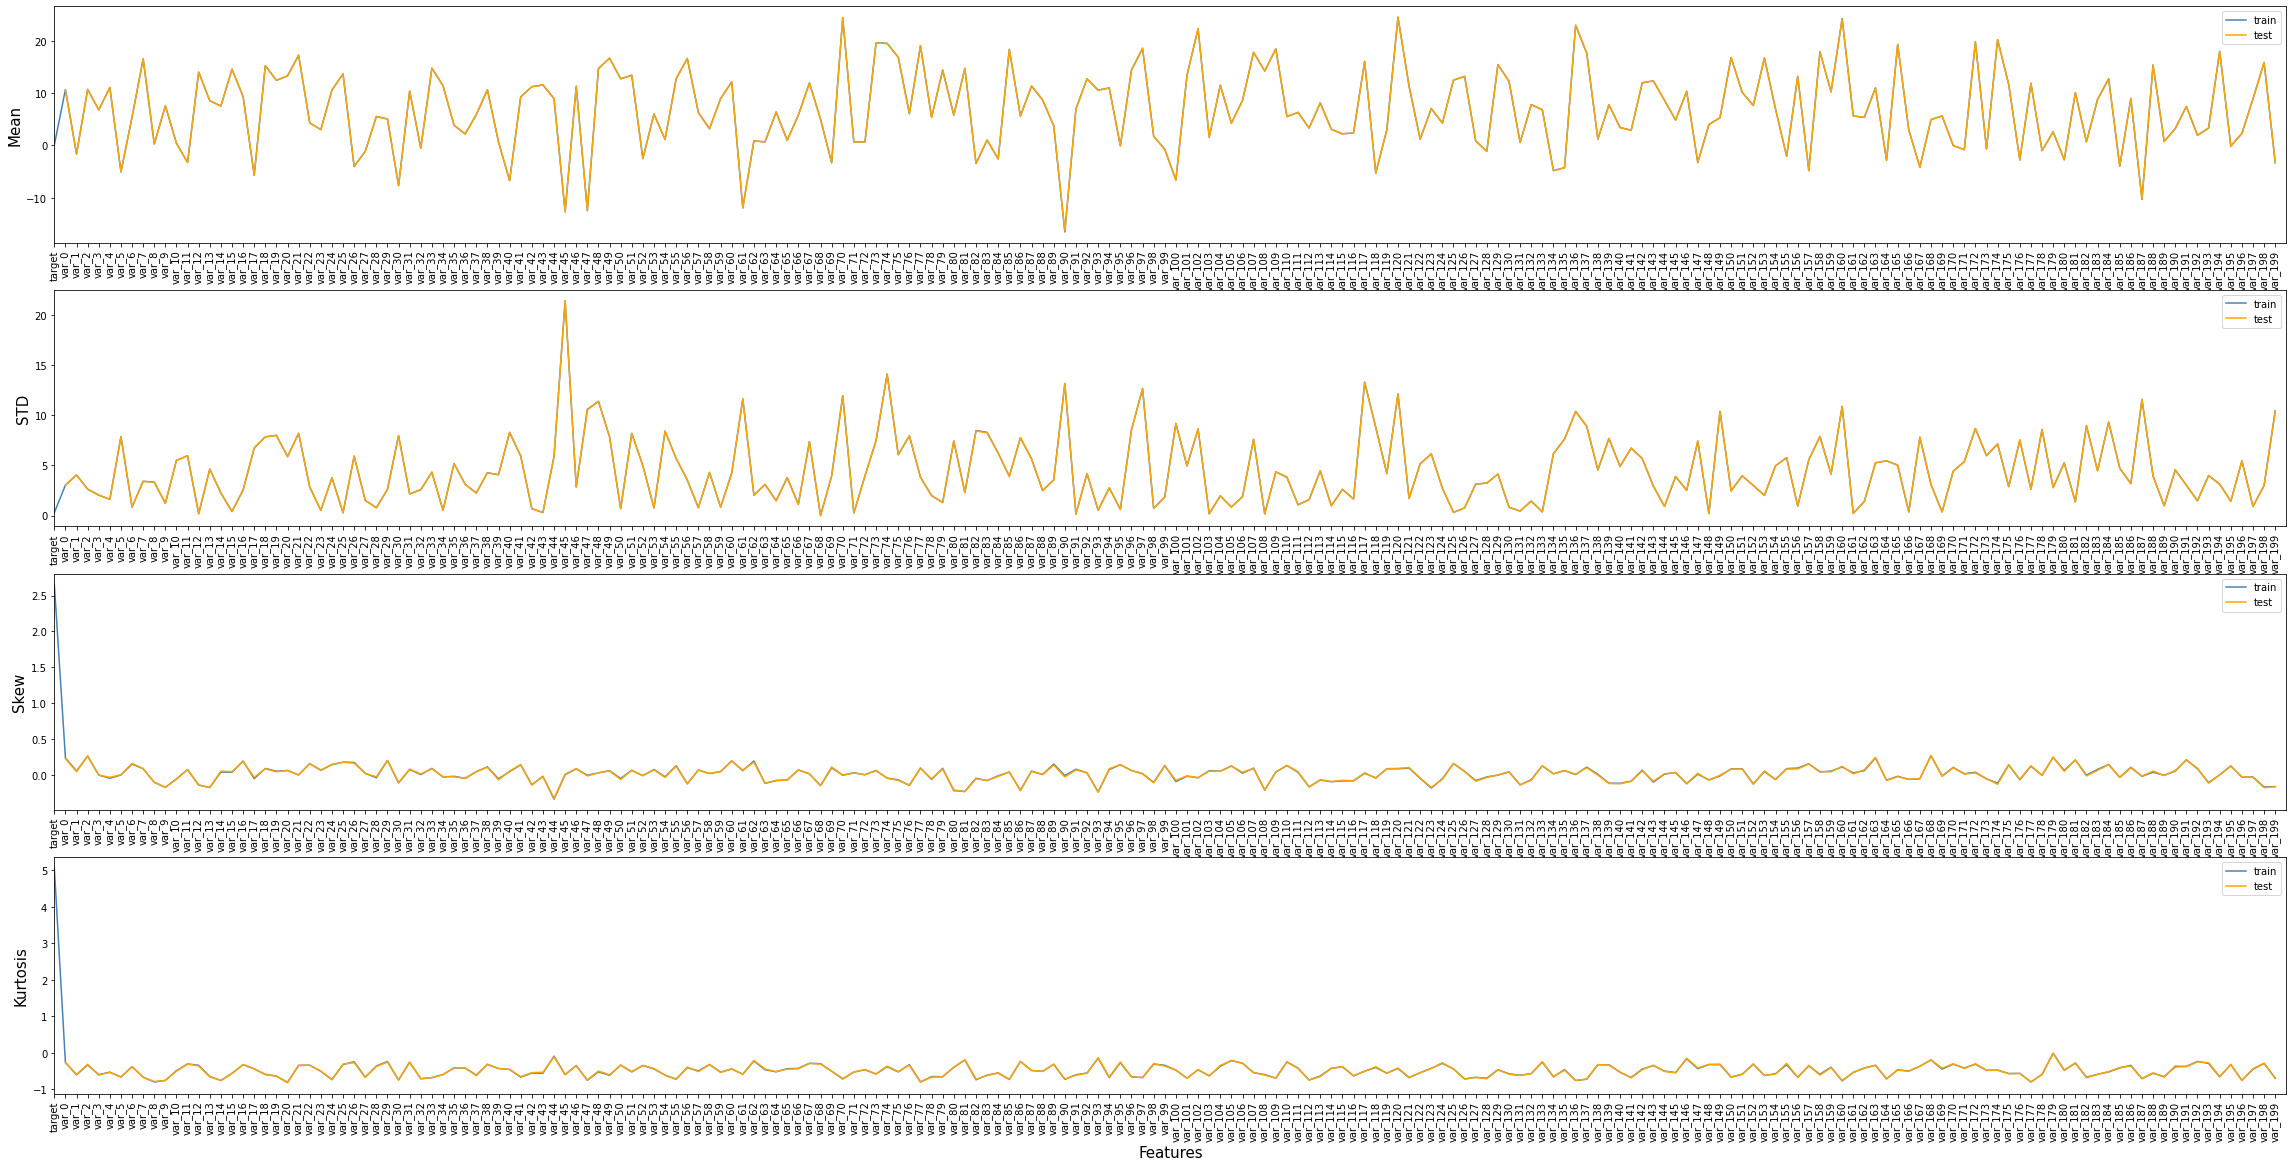

In [14]:
fig = plt.figure(figsize=(40, 20))

plt.subplot(411)
plt.plot(train.mean(), label="train", color="steelblue")
plt.plot(test.mean(), label="test", color="orange")
plt.xticks(range(train.drop(columns='ID_code').shape[1]), train.drop(columns='ID_code').columns, rotation=90)
plt.xlabel("Features", size=15)
plt.ylabel("Mean", size=15)
plt.xlim(0, train.drop(columns='ID_code').shape[1])
plt.legend()

plt.subplot(412)
plt.plot(train.std(), label="train", color="steelblue")
plt.plot(test.std(), label="test", color="orange")
plt.xticks(range(train.drop(columns='ID_code').shape[1]), train.drop(columns='ID_code').columns, rotation=90)
plt.xlabel("Features", size=15)
plt.ylabel("STD", size=15)
plt.xlim(0, train.drop(columns='ID_code').shape[1])
plt.legend()

plt.subplot(413)
plt.plot(train.skew(), label="train", color="steelblue")
plt.plot(test.skew(), label="test", color="orange")
plt.xticks(range(train.drop(columns='ID_code').shape[1]), train.drop(columns='ID_code').columns, rotation=90)
plt.xlabel("Features", size=15)
plt.ylabel("Skew", size=15)
plt.xlim(0, train.drop(columns='ID_code').shape[1])
plt.legend()

plt.subplot(414)
plt.plot(train.kurtosis(), label="train", color="steelblue")
plt.plot(test.kurtosis(), label="test", color="orange")
plt.xticks(range(train.drop(columns='ID_code').shape[1]), train.drop(columns='ID_code').columns, rotation=90)
plt.xlabel("Features", size=15)
plt.ylabel("Kurtosis", size=15)
plt.xlim(0, train.drop(columns='ID_code').shape[1])
plt.legend()

plt.show()

# Задание 5:
Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [101]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = True)
corr_with_target

var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
             ...   
var_26     0.062422
var_53     0.063399
var_110    0.064275
var_6      0.066731
target     1.000000
Name: target, Length: 201, dtype: float64

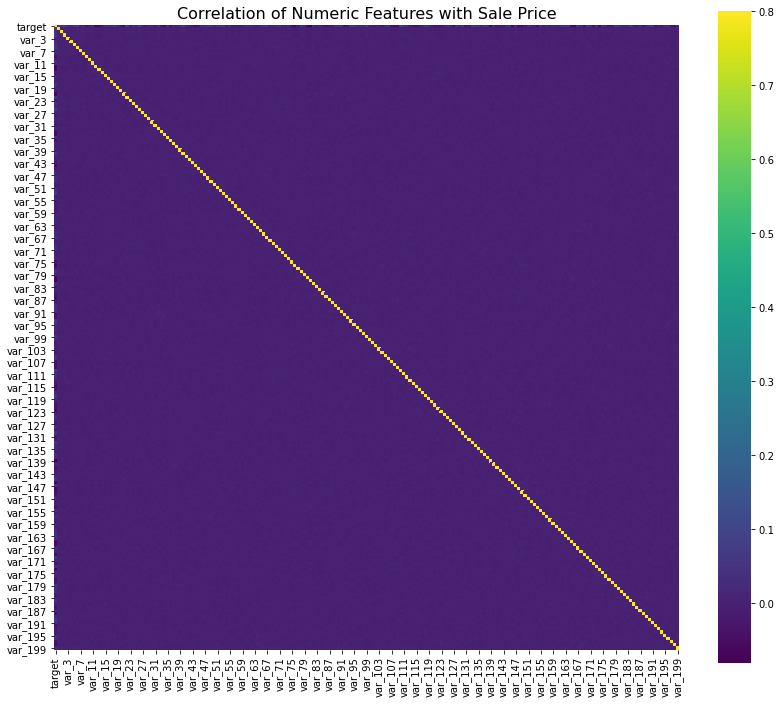

In [102]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

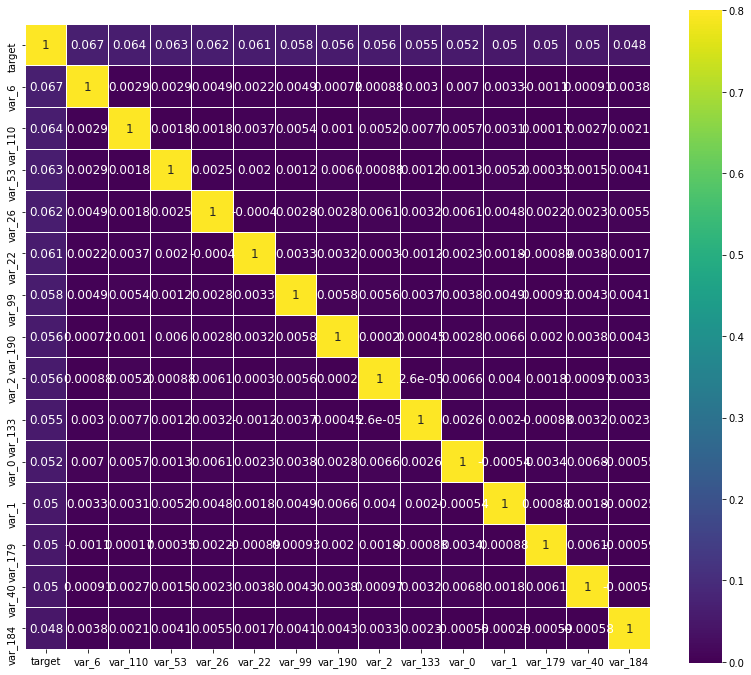

In [104]:
k = 15
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(train[cols].values.T)
fig, axes = plt.subplots(figsize = (14, 12))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

Связь между самими признаками мала или приближена к 0, это касается только линейной связи между признаками \
Пренебречь признаками не можем не смотря на том, что нет таких признаков линейная корреляция которых > 0.2 \
Может оказаться, что между признаками есть нелизнейная связь

# Задание 6:
Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [111]:
%%time
target = train['target']
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}
forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("target", axis=1), target)

Wall time: 3min 29s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

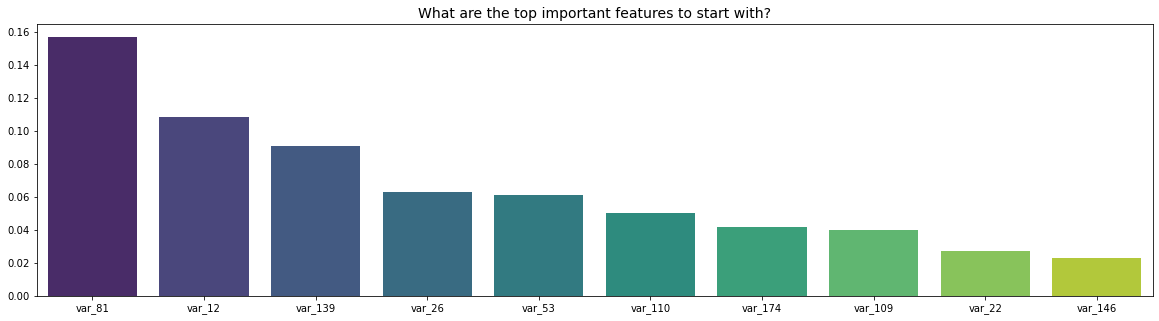

In [112]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)